# **1. Data Collection**

**1.1 Importing File Formats**

In [1]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

# Importing CSV file
df = pd.read_csv('most_viewed_youtube_shorts.csv')

**1.21 Checking Data Types**

In [2]:
data_types = df.dtypes
print("Data Types:\n", data_types)


Data Types:
 title             object
published_at      object
duration          object
view_count         int64
like_count       float64
comment_count    float64
dtype: object


**1.22 Checking Duplicates**

In [3]:
duplicates = df.duplicated().sum()
print("Number of Duplicates:", duplicates)


Number of Duplicates: 29


# **2. Data Exploration**

**2.1 Understanding the Structure**

**2.11 View the First Few Rows**

In [4]:
df.head()

,title,published_at,duration,view_count,like_count,comment_count
0,"She Was ""One Minute"" Away From Disaster! #shorts",2023-02-11T16:39:01Z,PT59S,746717484,13068287.0,19863.0
1,I HAVE BANGS… #Shorts,2021-08-30T09:42:50Z,PT23S,555825641,16003237.0,NaN
2,funny vadieo subscribe for more vadieos #shorts,2023-05-25T08:00:01Z,PT28S,482962560,8355647.0,15416.0
3,She turned pregnant and he let her go! #shorts,2022-07-25T11:00:43Z,PT1M,415148935,3954689.0,3807.0
4,Tom&Jerry.. Real End Twist 😆#shorts,2023-06-13T13:40:23Z,PT1M,395791994,6965246.0,NaN


**2.12 View DataFrame Information**

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   title          600 non-null    object 
 1   published_at   600 non-null    object 
 2   duration       600 non-null    object 
 3   view_count     600 non-null    int64  
 4   like_count     572 non-null    float64
 5   comment_count  572 non-null    float64
dtypes: float64(2), int64(1), object(3)
memory usage: 28.3+ KB


**2.13 Summary Statistics**

In [6]:
df.describe()

,view_count,like_count,comment_count
count,6.000000e+02,5.720000e+02,572.000000
mean,4.754194e+07,1.628001e+06,3850.106643
std,7.571700e+07,2.206242e+06,7402.461928
min,2.874130e+05,1.646900e+04,0.000000
25%,7.855342e+06,3.187580e+05,695.000000
50%,2.165652e+07,8.180850e+05,1604.000000
75%,4.776332e+07,1.996283e+06,3607.250000
max,7.467175e+08,1.600324e+07,82889.000000


**2.14 View Column Names**

In [7]:
df.columns

Index(['title', 'published_at', 'duration', 'view_count', 'like_count',
       'comment_count'],
      dtype='object')

**2.15 Shape of the Data**

In [8]:
df.shape

(600, 6)

**2.16 View a Desired Sample of 5 Rows**

In [9]:
df.sample(5)

,title,published_at,duration,view_count,like_count,comment_count
462,"cat 🐱/the amazing digital circus/ft:pomni,raga...",2023-12-16T11:40:10Z,PT15S,6511214,313884.0,13739.0
362,Sneak Food Into Class 💄+🍫 #shorts,2023-02-10T07:53:40Z,PT27S,15857805,534186.0,499.0
162,मेरे पुराने Books Use कर ले 😆 | Badi Behen - C...,2023-06-01T03:47:42Z,PT1M,43602830,2079488.0,1407.0
302,NẮNG LẮM #Shorts,2023-03-13T10:30:02Z,PT1M,20884100,425551.0,866.0
368,Comment me jaimata Di zaroor likhhna ❤️ #shorts,2023-03-25T10:09:46Z,PT1M,15283391,979895.0,7080.0


**2.2 Missing Values**

**2.21 Identifying Missing Values**

In [10]:
df.isnull().sum()

title             0
published_at      0
duration          0
view_count        0
like_count       28
comment_count    28
dtype: int64

**2.22 Dropping Rows or Columns with Missing Values**

In [11]:
# Drop rows with any missing values
df_cleaned = df.dropna()

# Drop columns with any missing values
df_cleaned = df.dropna(axis=1)

# **3. Data Cleaning**

**3.1 Identifying Outliers Using Z-Score**

In [12]:
from scipy import stats

# Calculate Z-scores of each value in the DataFrame
z_scores = stats.zscore(df.select_dtypes(include=['float64', 'int64']))

# Identify outliers (Z-score > 3 or < -3)
df_outliers = df[(z_scores > 3).any(axis=1) | (z_scores < -3).any(axis=1)]

**3.2 Remove Outliers**

In [13]:
# Remove rows with outliers based on Z-score
df_no_outliers = df[(z_scores < 3).all(axis=1) & (z_scores > -3).all(axis=1)]

# **An In Depth Analysis of Shorts**

**Distribution of Views**

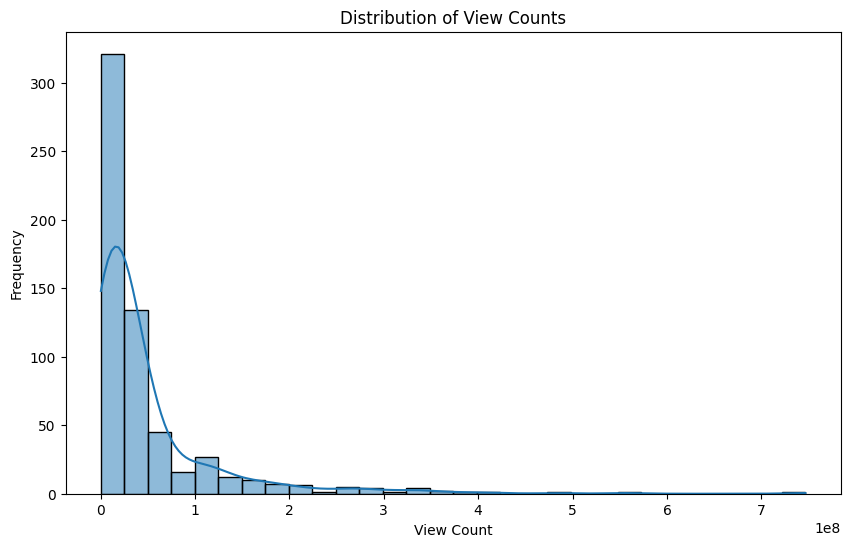

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting the distribution of view_count
plt.figure(figsize=(10, 6))
sns.histplot(df['view_count'], bins=30, kde=True)
plt.title('Distribution of View Counts')
plt.xlabel('View Count')
plt.ylabel('Frequency')
plt.show()

**Relationship Between Views and Likes**

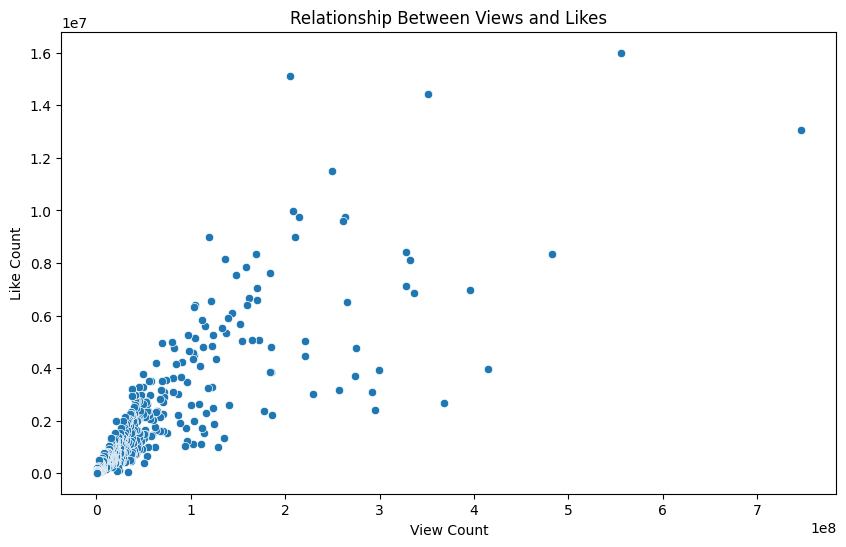

In [15]:
# Scatter plot of view_count vs like_count
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='view_count', y='like_count')
plt.title('Relationship Between Views and Likes')
plt.xlabel('View Count')
plt.ylabel('Like Count')
plt.show()

**Top 10 Most Liked Shorts**

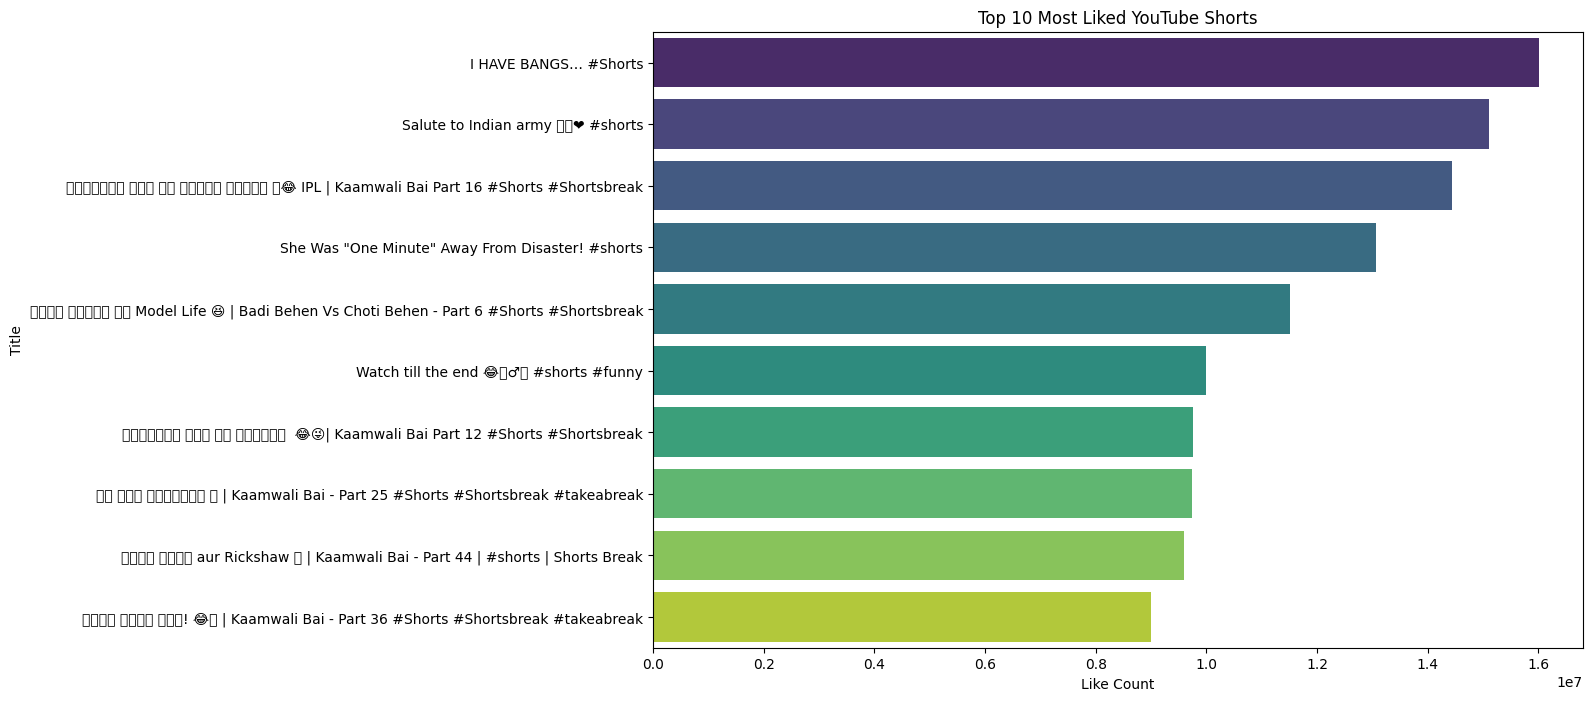

In [16]:
# Extracting top 10 most liked shorts
top_liked_shorts = df.nlargest(10, 'like_count')

# Bar plot of top 10 most liked shorts
plt.figure(figsize=(12, 8))
sns.barplot(data=top_liked_shorts, x='like_count', y='title', palette='viridis')
plt.title('Top 10 Most Liked YouTube Shorts')
plt.xlabel('Like Count')
plt.ylabel('Title')
plt.show()

**Views and Comments Over Time**

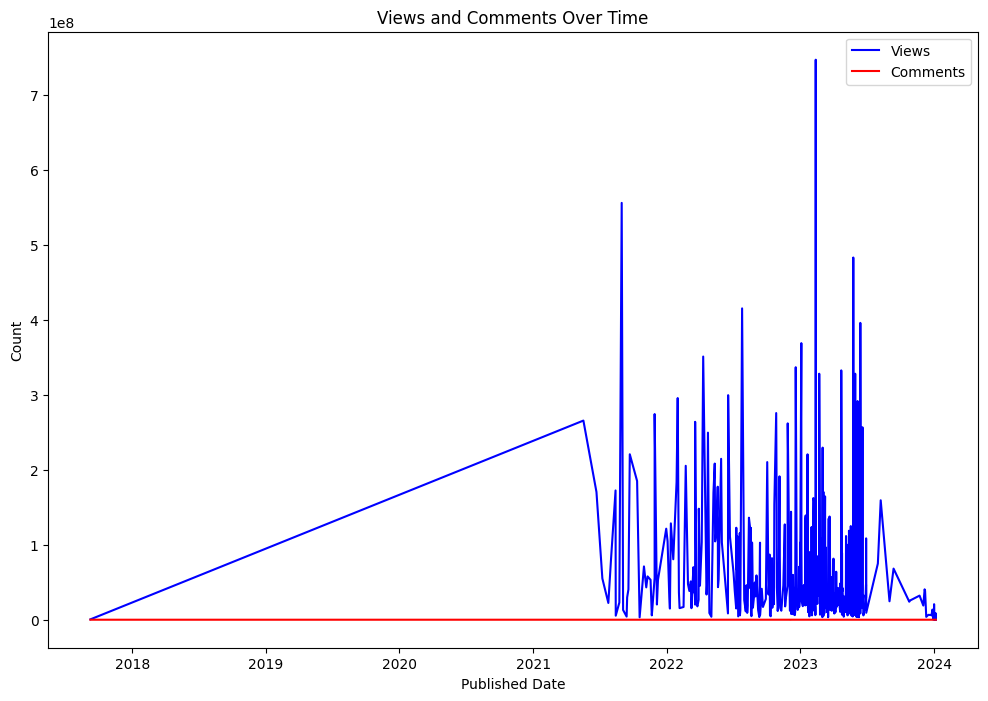

In [17]:
# Convert published_at to datetime
df['published_at'] = pd.to_datetime(df['published_at'])

# Plotting views and comments over time
plt.figure(figsize=(12, 8))
sns.lineplot(data=df, x='published_at', y='view_count', label='Views', color='blue')
sns.lineplot(data=df, x='published_at', y='comment_count', label='Comments', color='red')
plt.title('Views and Comments Over Time')
plt.xlabel('Published Date')
plt.ylabel('Count')
plt.legend()
plt.show()

**Correlation Matrix**

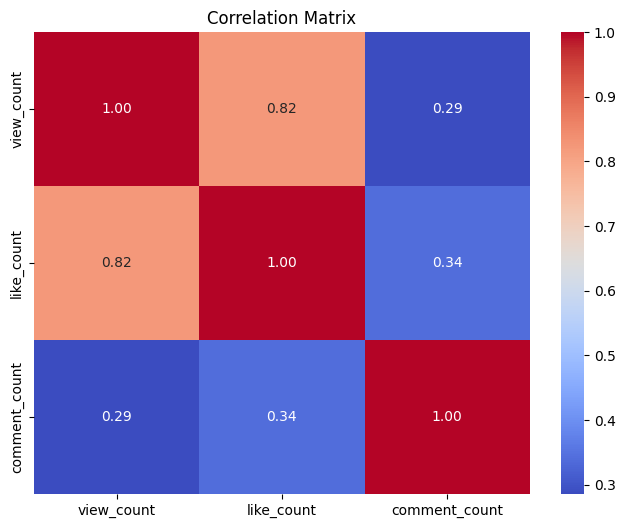

In [18]:
# Compute correlation matrix
correlation_matrix = df[['view_count', 'like_count', 'comment_count']].corr()

# Plotting the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

**Distribution of Video Durations**

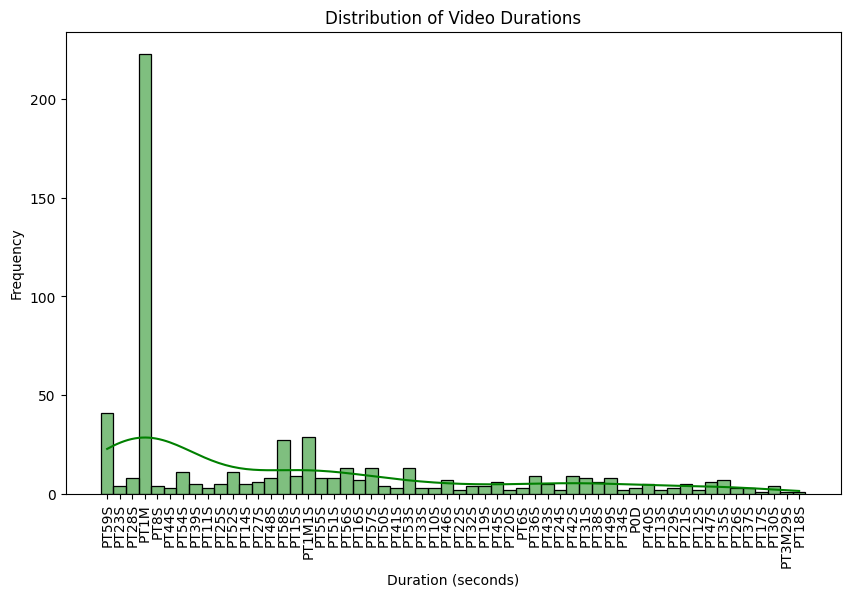

In [19]:
plt.figure(figsize=(10, 6))
sns.histplot(df['duration'], bins=30, kde=True, color='green')
plt.title('Distribution of Video Durations')
plt.xlabel('Duration (seconds)')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.show()

**Video Duration vs View Count**

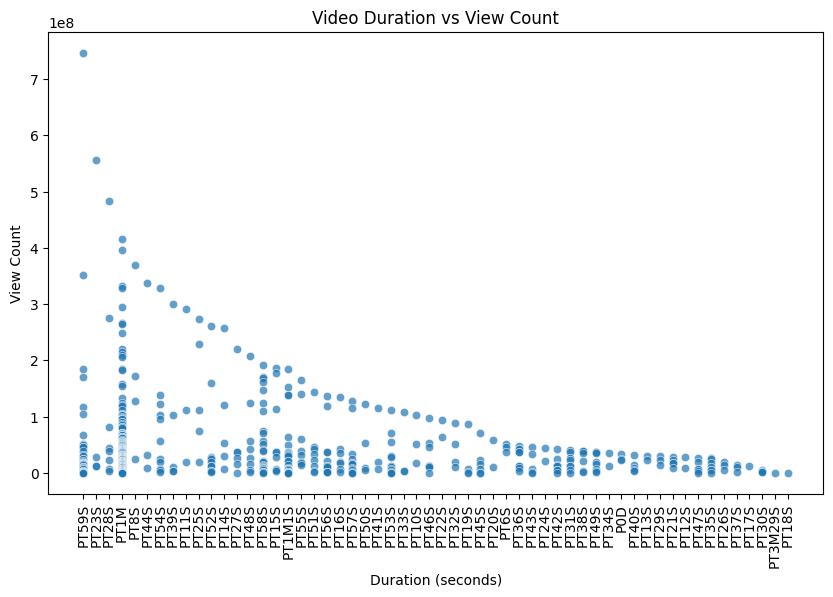

In [20]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='duration', y='view_count', alpha=0.7)
plt.title('Video Duration vs View Count')
plt.xlabel('Duration (seconds)')
plt.ylabel('View Count')
plt.xticks(rotation=90)
plt.show()

**Likes vs Comments**

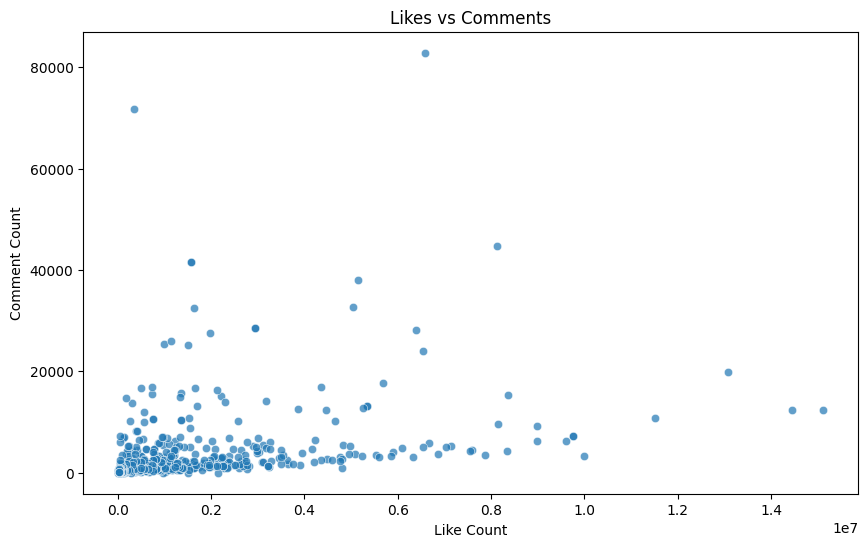

In [21]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='like_count', y='comment_count', alpha=0.7)
plt.title('Likes vs Comments')
plt.xlabel('Like Count')
plt.ylabel('Comment Count')
plt.show()

**Top 10 Shorts by Comment Count**

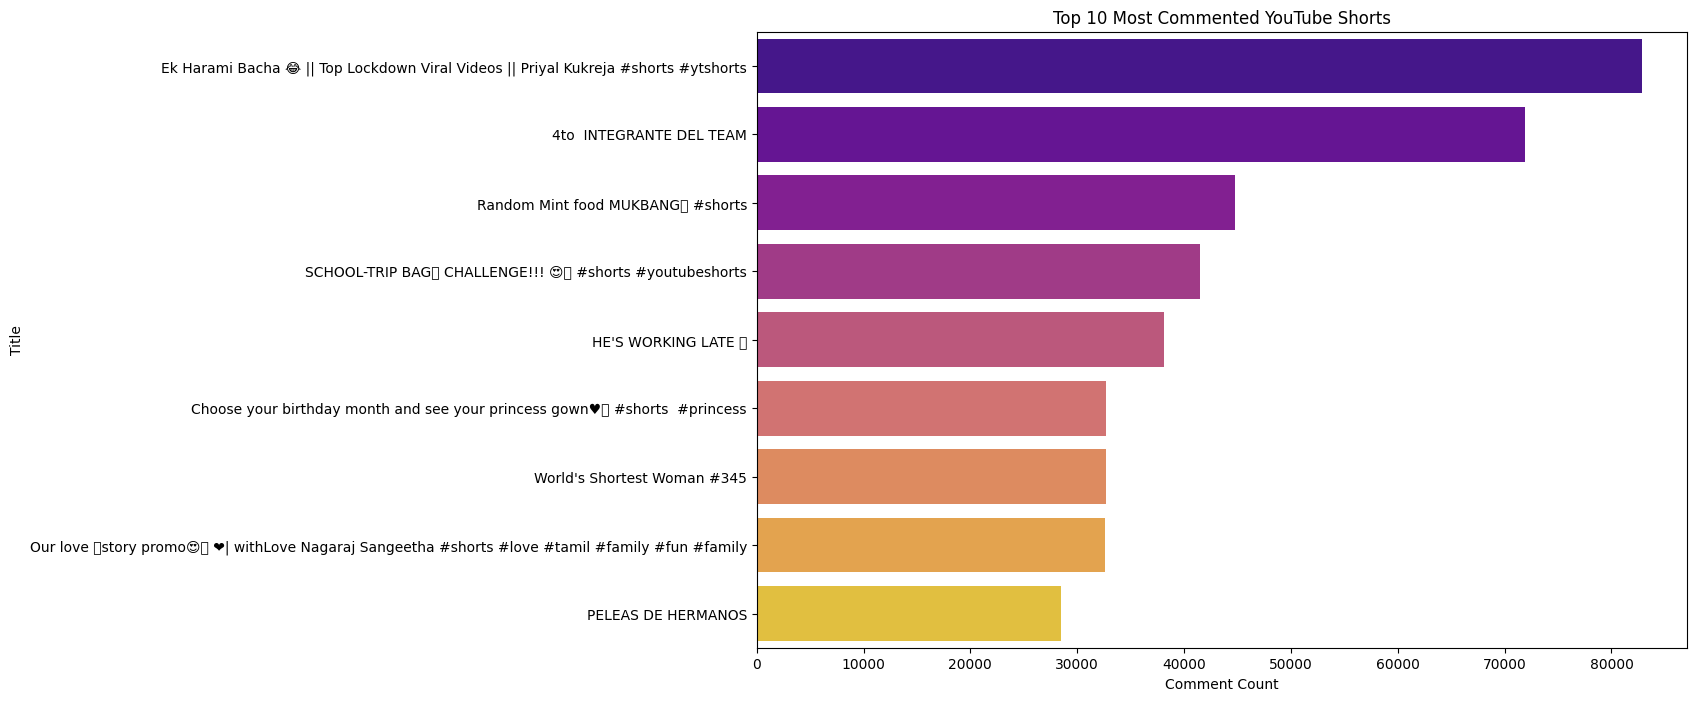

In [22]:
# Extracting top 10 most commented shorts
top_commented_shorts = df.nlargest(10, 'comment_count')

# Bar plot of top 10 most commented shorts
plt.figure(figsize=(12, 8))
sns.barplot(data=top_commented_shorts, x='comment_count', y='title', palette='plasma')
plt.title('Top 10 Most Commented YouTube Shorts')
plt.xlabel('Comment Count')
plt.ylabel('Title')
plt.show()

**Number of Videos Published Per Month**

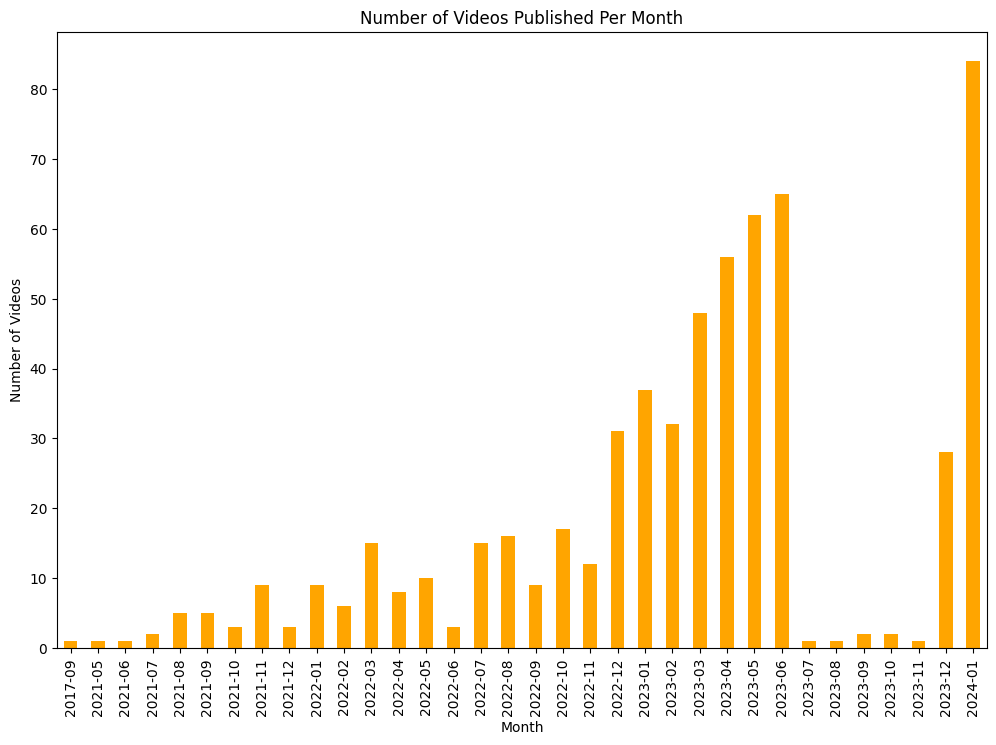

In [23]:
# Extracting month and year from published_at
df['year_month'] = df['published_at'].dt.to_period('M')

# Counting videos per month
videos_per_month = df['year_month'].value_counts().sort_index()

# Plotting number of videos published per month
plt.figure(figsize=(12, 8))
videos_per_month.plot(kind='bar', color='orange')
plt.title('Number of Videos Published Per Month')
plt.xlabel('Month')
plt.ylabel('Number of Videos')
plt.xticks(rotation=90)
plt.show()

**Views Over Time (Monthly Aggregation)**

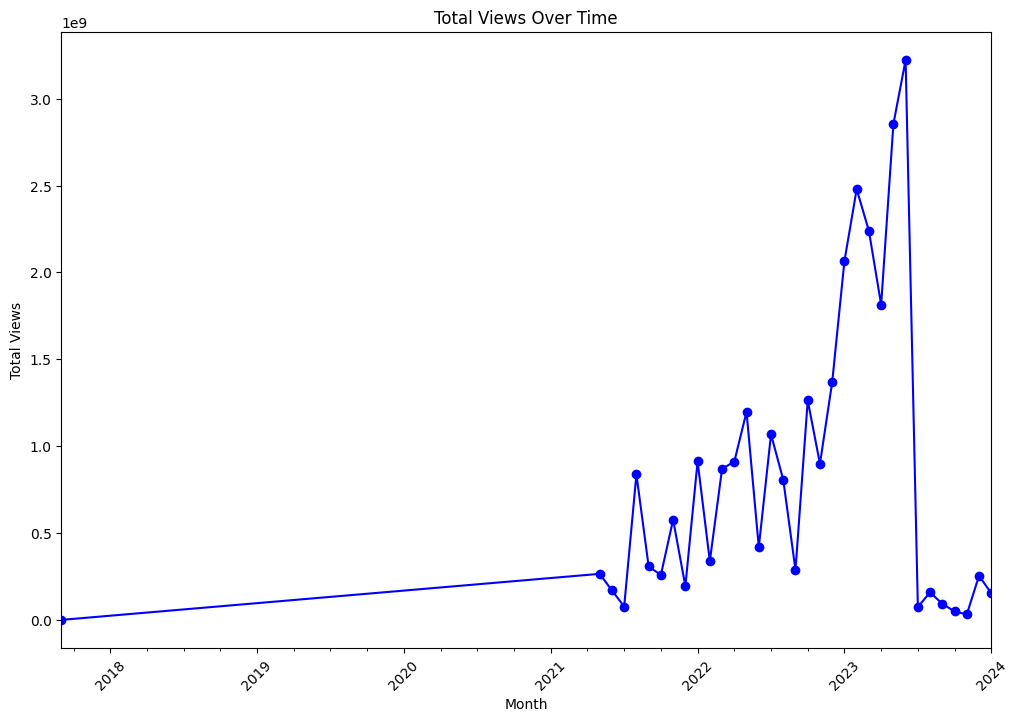

In [24]:
# Monthly aggregation of views
monthly_views = df.groupby('year_month')['view_count'].sum()

# Plotting monthly views
plt.figure(figsize=(12, 8))
monthly_views.plot(kind='line', marker='o', color='blue')
plt.title('Total Views Over Time')
plt.xlabel('Month')
plt.ylabel('Total Views')
plt.xticks(rotation=45)
plt.show()

**Boxplot of Likes by Duration**

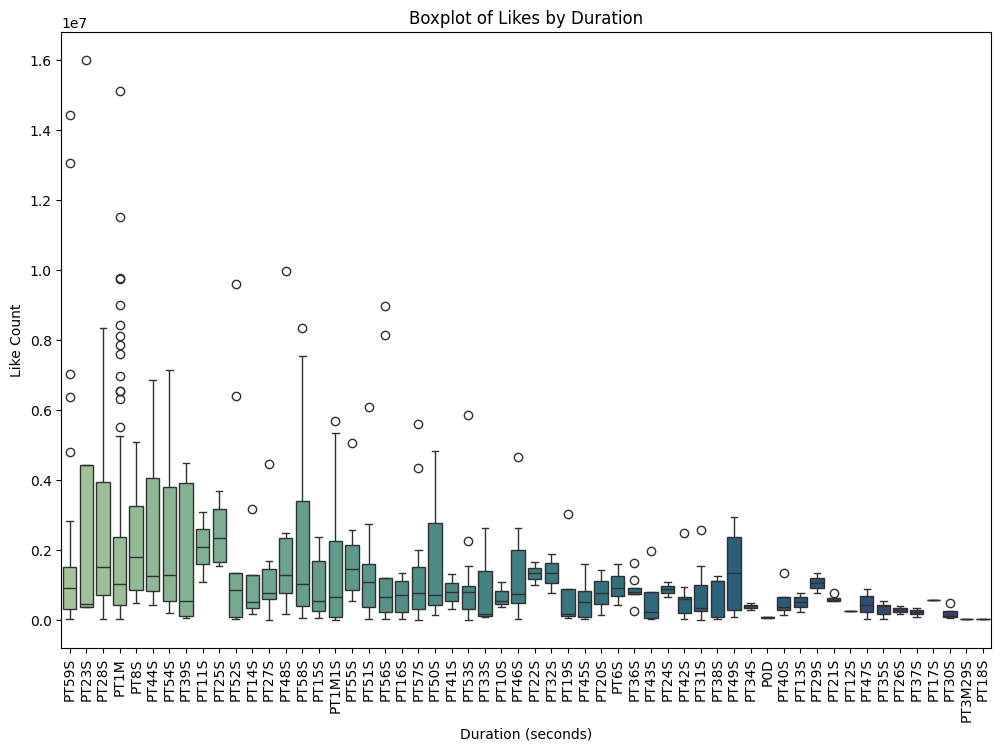

In [25]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=df, x='duration', y='like_count', palette='crest')
plt.title('Boxplot of Likes by Duration')
plt.xlabel('Duration (seconds)')
plt.ylabel('Like Count')
plt.xticks(rotation=90)
plt.show()

**Histogram of Video Durations**

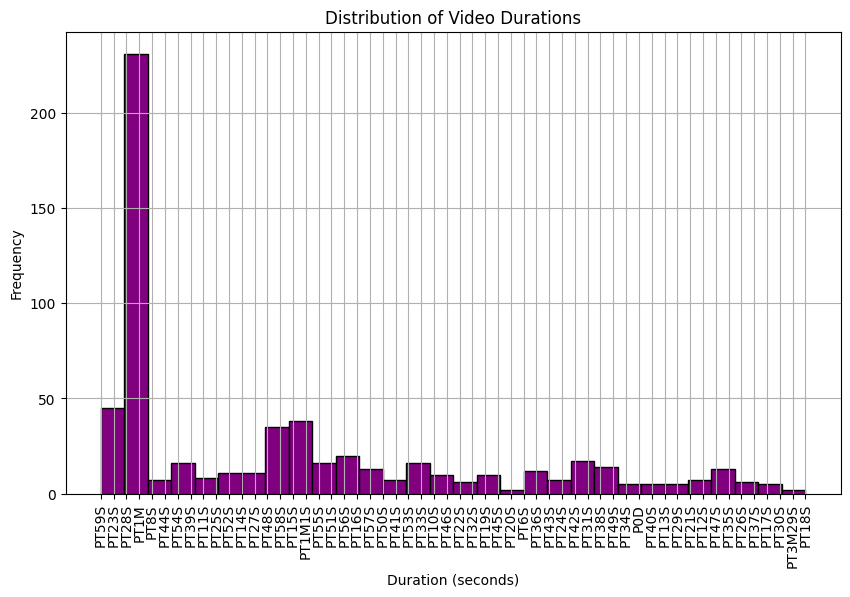

In [26]:
import matplotlib.pyplot as plt

# Histogram of video durations
plt.figure(figsize=(10, 6))
plt.hist(df['duration'], bins=30, color='purple', edgecolor='black')
plt.title('Distribution of Video Durations')
plt.xlabel('Duration (seconds)')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

**Scatter Plot of Duration vs Views**

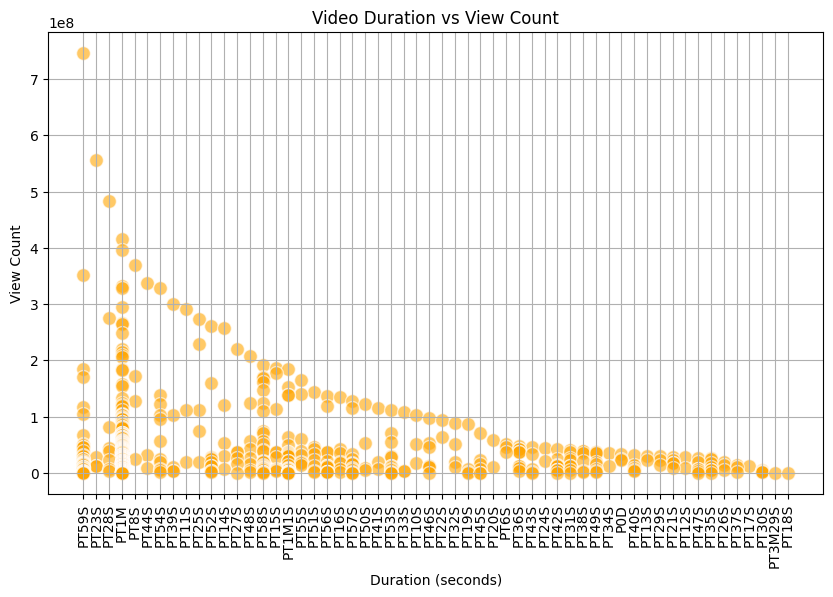

In [27]:
plt.figure(figsize=(10, 6))
plt.scatter(df['duration'], df['view_count'], alpha=0.6, c='orange', edgecolors='w', s=100)
plt.title('Video Duration vs View Count')
plt.xlabel('Duration (seconds)')
plt.ylabel('View Count')
plt.grid(True)
plt.xticks(rotation=90)
plt.show()

**Scatter Plot of Likes vs Comments**

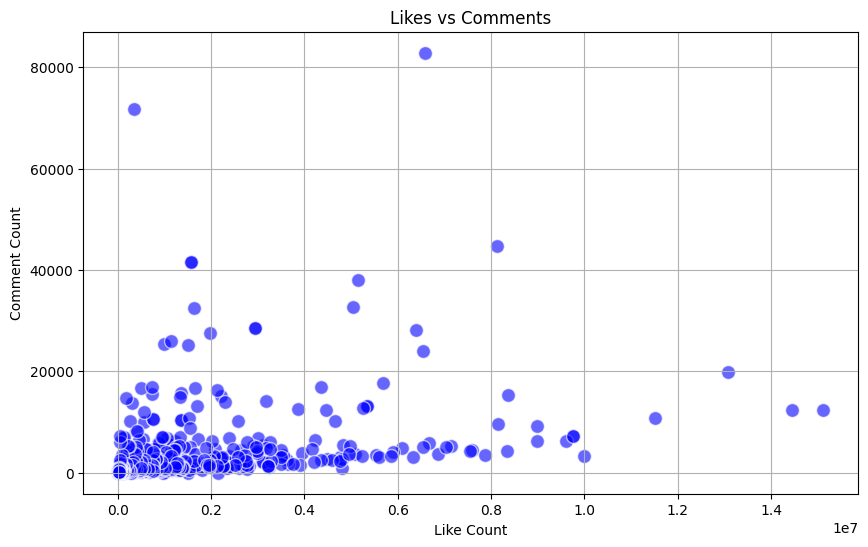

In [28]:
plt.figure(figsize=(10, 6))
plt.scatter(df['like_count'], df['comment_count'], alpha=0.6, c='blue', edgecolors='w', s=100)
plt.title('Likes vs Comments')
plt.xlabel('Like Count')
plt.ylabel('Comment Count')
plt.grid(True)
plt.show()

**Bar Plot of Top 10 Most Commented Shorts**

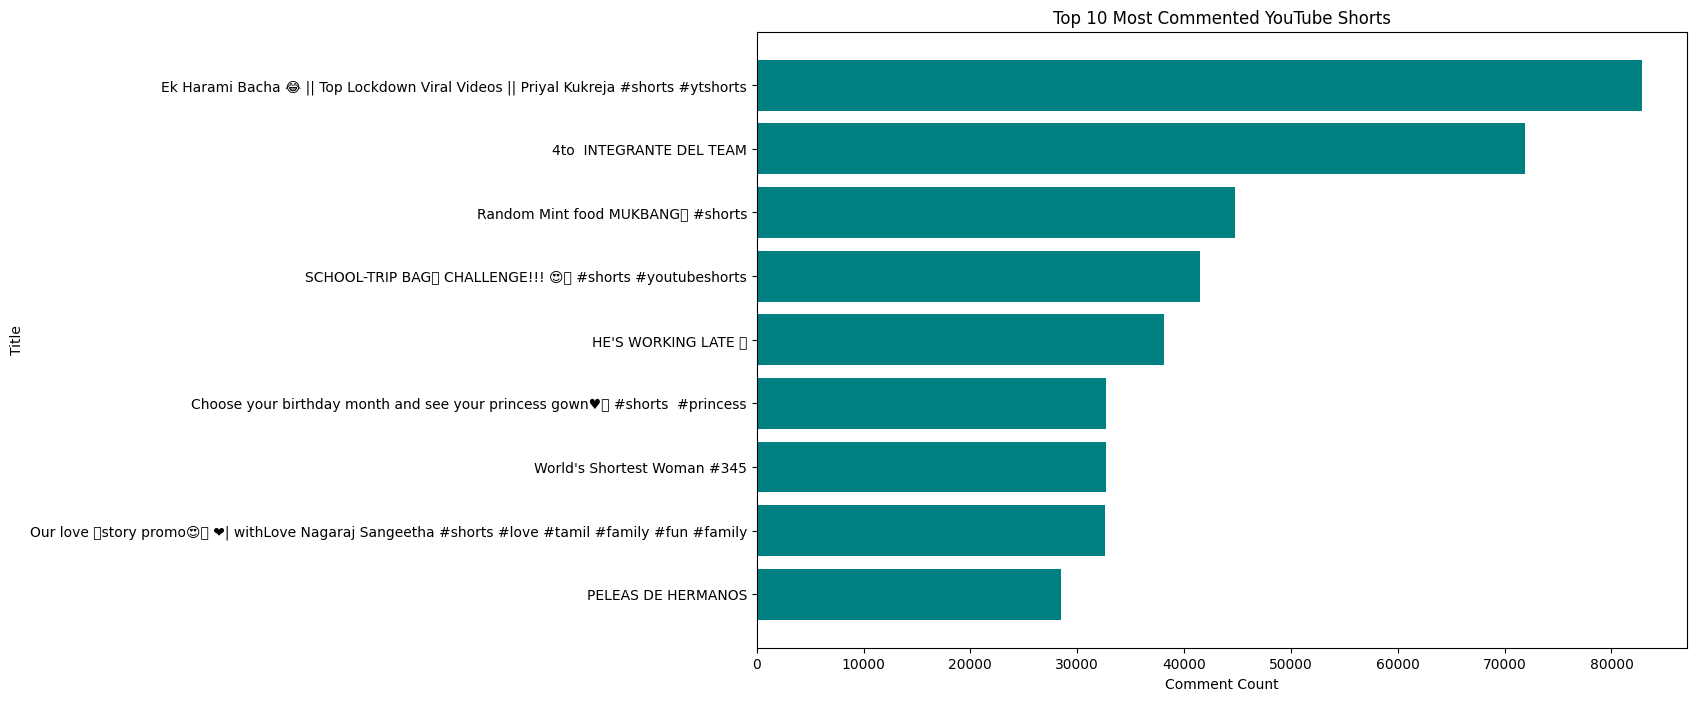

In [29]:
# Extracting top 10 most commented shorts
top_commented_shorts = df.nlargest(10, 'comment_count')

plt.figure(figsize=(12, 8))
plt.barh(top_commented_shorts['title'], top_commented_shorts['comment_count'], color='teal')
plt.title('Top 10 Most Commented YouTube Shorts')
plt.xlabel('Comment Count')
plt.ylabel('Title')
plt.gca().invert_yaxis()  # To display the highest values at the top
plt.show()

**Number of Videos Published Per Month**

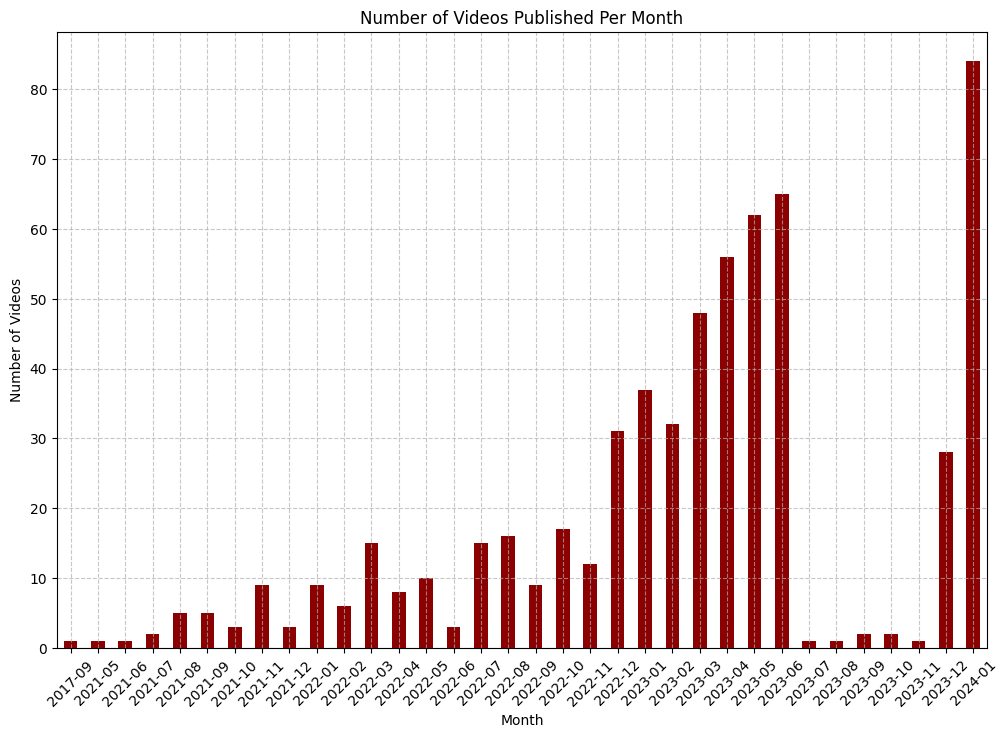

In [30]:
# Extracting month and year from published_at
df['year_month'] = df['published_at'].dt.to_period('M')

# Counting videos per month
videos_per_month = df['year_month'].value_counts().sort_index()

plt.figure(figsize=(12, 8))
videos_per_month.plot(kind='bar', color='darkred')
plt.title('Number of Videos Published Per Month')
plt.xlabel('Month')
plt.ylabel('Number of Videos')
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

**Views Over Time (Monthly Aggregation)**

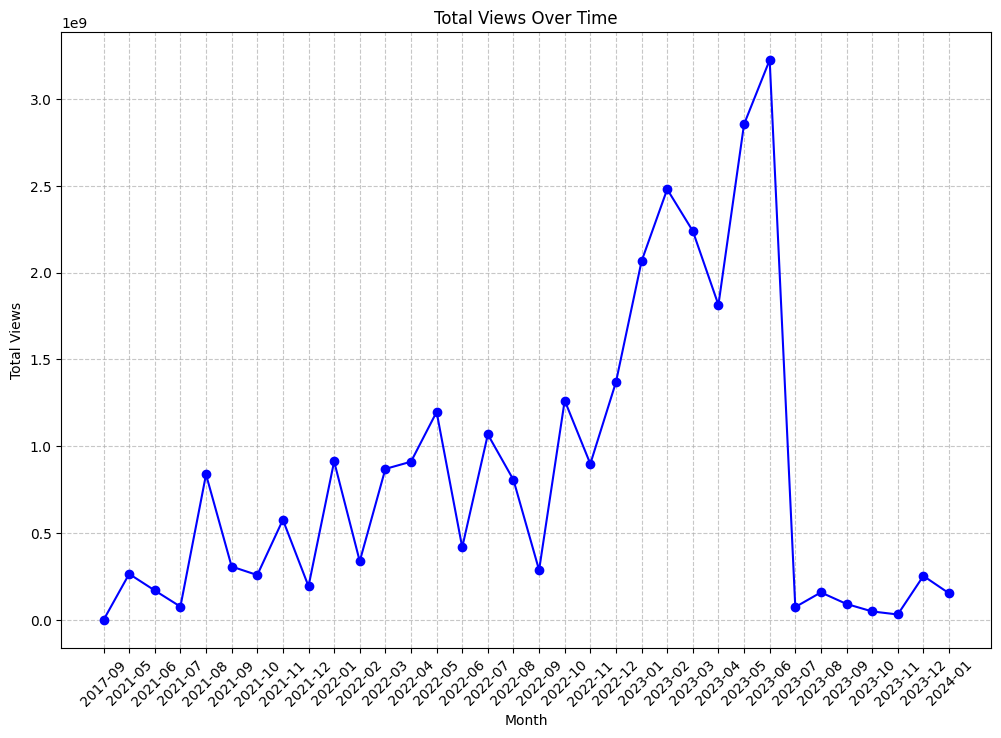

In [31]:
# Monthly aggregation of views
monthly_views = df.groupby('year_month')['view_count'].sum()

plt.figure(figsize=(12, 8))
plt.plot(monthly_views.index.astype(str), monthly_views.values, marker='o', color='blue')
plt.title('Total Views Over Time')
plt.xlabel('Month')
plt.ylabel('Total Views')
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

**Combined Histogram of Views and Likes**

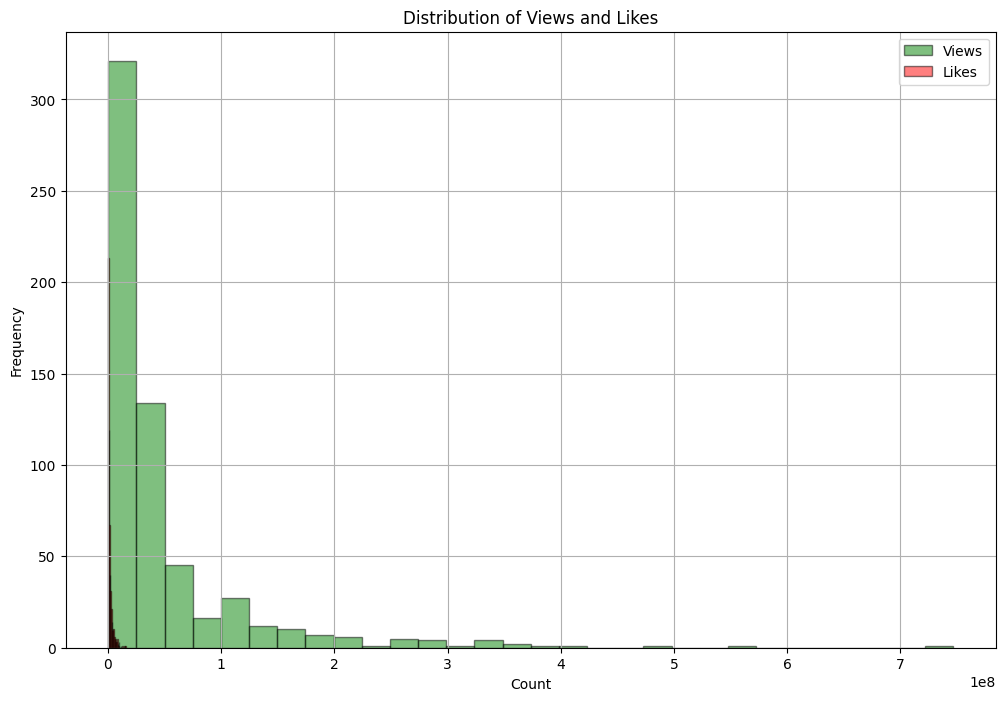

In [32]:
plt.figure(figsize=(12, 8))

# Histogram for view_count
plt.hist(df['view_count'], bins=30, alpha=0.5, label='Views', color='green', edgecolor='black')

# Histogram for like_count
plt.hist(df['like_count'], bins=30, alpha=0.5, label='Likes', color='red', edgecolor='black')

plt.title('Distribution of Views and Likes')
plt.xlabel('Count')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()

**Heatmap of Correlations**

<Figure size 800x600 with 0 Axes>

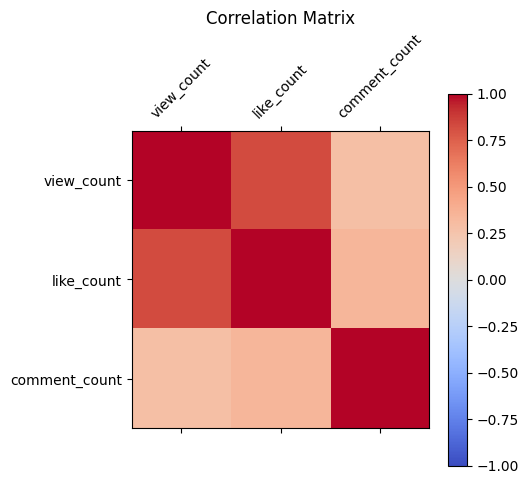

In [33]:
import numpy as np

# Compute correlation matrix
correlation_matrix = df[['view_count', 'like_count', 'comment_count']].corr()

# Plotting the correlation matrix
plt.figure(figsize=(8, 6))
cax = plt.matshow(correlation_matrix, cmap='coolwarm', vmin=-1, vmax=1)
plt.colorbar(cax)
plt.title('Correlation Matrix')
plt.xticks(np.arange(len(correlation_matrix.columns)), correlation_matrix.columns, rotation=45)
plt.yticks(np.arange(len(correlation_matrix.columns)), correlation_matrix.columns)
plt.show()